In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# # update the name in record
# base_root = "/home/user01/majiajian/data/polyp/SUN-SEG_10/multiple_controlnet_inpaint"
# for i in range(1,6):
#     data = pd.read_csv(os.path.join(base_root, "{}.csv".format(i)))
#     names = [name.split(".")[0] for name in data['name']]
#     data['name'] = names
#     data.to_csv(os.path.join(base_root, "{}_new.csv".format(i)), index=False)

    

Alignment Score: mean: 0.8343028600100352, std: 0.1532827898188189, median: 0.8843
Prediction Score: mean: 0.648798845960863, std: 0.38574425177947375, median: 0.8695
number of cases with alignment score > 0.75: 1701
number of cases with prediction score > 0.8: 1164
nubmer of cases with alignment score > 0.75 and prediction score < 0.9: 846
Alignment Score: mean: 0.8320081284495735, std: 0.1602308341578229, median: 0.8849
Prediction Score: mean: 0.636470797792273, std: 0.38974641802908017, median: 0.8645
number of cases with alignment score > 0.75: 1694
number of cases with prediction score > 0.8: 1135
nubmer of cases with alignment score > 0.75 and prediction score < 0.9: 858
Alignment Score: mean: 0.8369860511791268, std: 0.1492066925979443, median: 0.8879
Prediction Score: mean: 0.6491724535875566, std: 0.38558091461436855, median: 0.8703
number of cases with alignment score > 0.75: 1699
number of cases with prediction score > 0.8: 1172
nubmer of cases with alignment score > 0.75 an

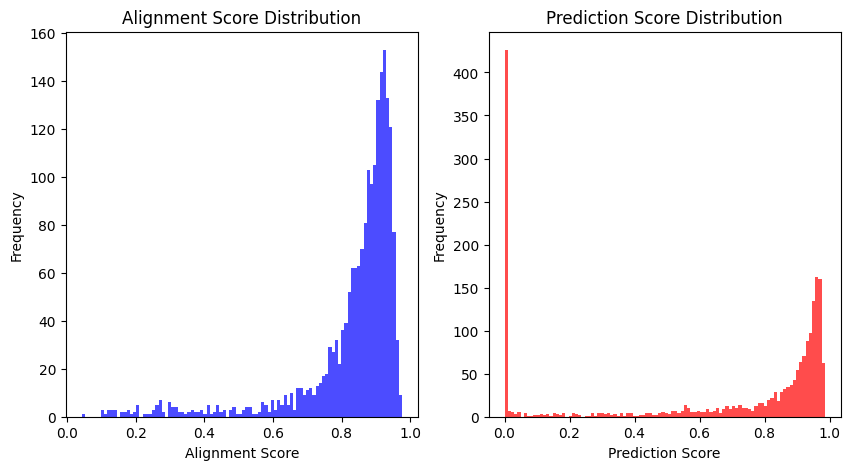

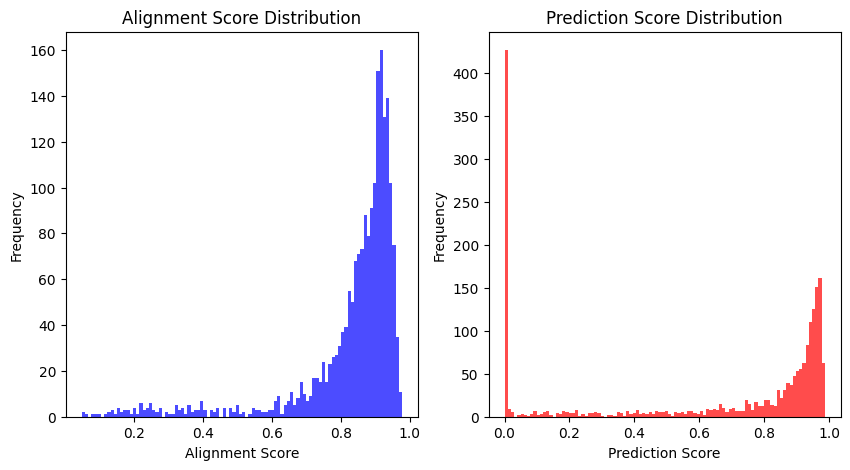

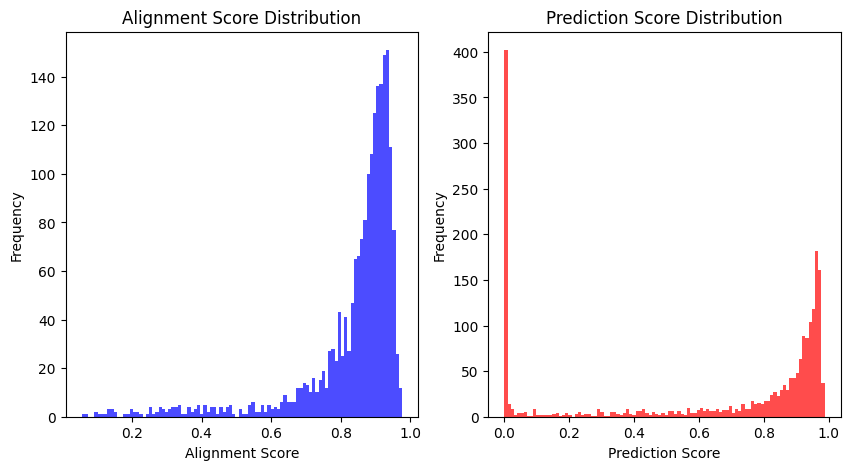

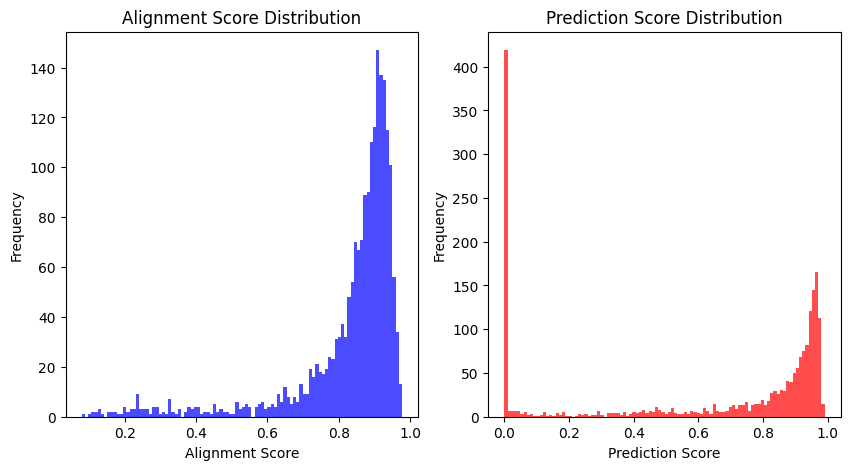

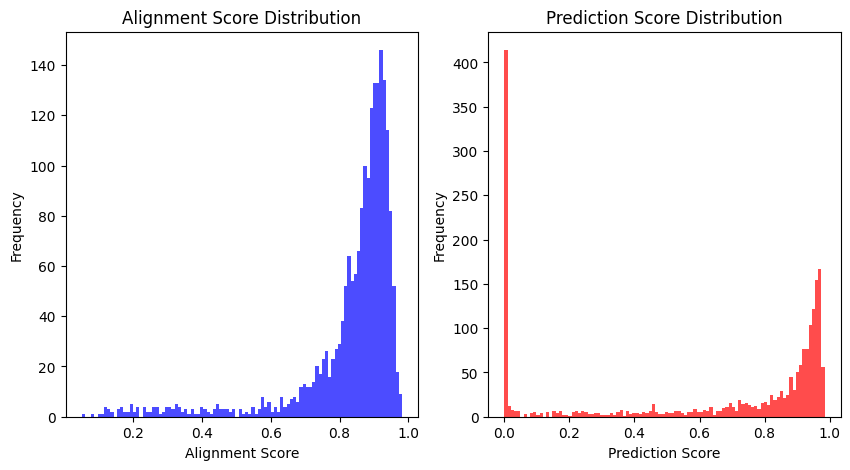

In [21]:
base_root = "/home/user01/majiajian/data/polyp/SUN-SEG_10/multiple_controlnet_inpaint"

# check the distribution of alignment score and prediction score
for i in range(1,6):
    data = pd.read_csv(os.path.join(base_root,  "{}_new.csv".format(i)))
    alignment_score = data["alignment_score"]
    prediction_score = data["prediction_score"]
    
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].hist(alignment_score, bins=100, color='b', alpha=0.7)
    ax[0].set_title("Alignment Score Distribution")
    ax[0].set_xlabel("Alignment Score")
    ax[0].set_ylabel("Frequency")
    
    ax[1].hist(prediction_score, bins=100, color='r', alpha=0.7)
    ax[1].set_title("Prediction Score Distribution")
    ax[1].set_xlabel("Prediction Score")
    ax[1].set_ylabel("Frequency")
    
    plt.savefig(os.path.join(base_root, "{}_distribution.png".format(i)))
    
    print("Alignment Score: mean: {}, std: {}, median: {}".format(np.mean(alignment_score), np.std(alignment_score), np.median(alignment_score)))
    print("Prediction Score: mean: {}, std: {}, median: {}".format(np.mean(prediction_score), np.std(prediction_score), np.median(prediction_score)))
    
    print("number of cases with alignment score > 0.75: {}".format(len(alignment_score[alignment_score>0.75])))
    print("number of cases with prediction score > 0.8: {}".format(len(prediction_score[prediction_score>0.8])))
    print("nubmer of cases with alignment score > 0.75 and prediction score < 0.9: {}".format(len(data[(data["alignment_score"]>0.75) & (data["prediction_score"]<0.9)])))
    
    

In [10]:
# build the csv that map the path of original image, remove background, generated image, inpainted background, alignment score, prediction score
original_root = "/home/user01/majiajian/data/polyp/SUN-SEG_10/TrainDataset_10"
inpainted_root = "/home/user01/majiajian/data/polyp/SUN-SEG_10/multiple_controlnet_inpaint"
remove_root = "/home/user01/majiajian/data/polyp/SUN-SEG_10/SUN-SEG_10_remove/remove"


# for the original images

names = []
folders = []
original_images = []
original_masks = []

original_images_root = os.path.join(original_root, "images")
original_masks_root = os.path.join(original_root, "masks")

for folder in os.listdir(original_images_root):
    for file in os.listdir(os.path.join(original_images_root, folder)):
        name = file.split(".")[0]
        names.append(name)
        folders.append(folder)
        original_images.append(os.path.join(original_images_root, folder, file))
        original_masks.append(os.path.join(original_masks_root, folder, name+".png"))
        
original_data = pd.DataFrame({"name": names, "original_image": original_images, "original_mask": original_masks, "folder": folders})
original_data.to_csv(os.path.join(base_root, "original_data.csv"), index=False)

In [12]:
# for the remove images

remove_root = os.path.join(remove_root, "images")
remove_images_path = [os.path.join(remove_root, file) for file in os.listdir(remove_root)]
names = [file.split(".")[0] for file in os.listdir(remove_root)]

remove_images_path.sort()
names.sort()

remove_data = pd.DataFrame({"name": names, "remove_image": remove_images_path})
remove_data.to_csv(os.path.join(base_root, "remove_data.csv"), index=False)

In [18]:
# for the inpainted images

for iter in range(1, 6):
    inpaint_images_root = os.path.join(inpainted_root, "images", str(iter))
    inpaint_masks_root = os.path.join(inpainted_root, "refined_masks", str(iter))
    inpaint_background_root = os.path.join(inpainted_root, "background", str(iter))

    inpaint_images_path = [os.path.join(inpaint_images_root, file) for file in os.listdir(inpaint_images_root)]
    inpaint_masks_path = [os.path.join(inpaint_masks_root, file) for file in os.listdir(inpaint_masks_root)]
    inpaint_background_path = [os.path.join(inpaint_background_root, file) for file in os.listdir(inpaint_background_root)]
    name = [file.split(".")[0] for file in os.listdir(inpaint_images_root)]
    
    inpaint_images_path.sort()
    inpaint_masks_path.sort()
    inpaint_background_path.sort()
    name.sort()
    
    inpaint_data = pd.DataFrame({"name": name, "inpaint_image": inpaint_images_path, "inpaint_mask": inpaint_masks_path, "inpaint_background": inpaint_background_path})
    
    score_data = pd.read_csv(os.path.join(base_root, "{}_new.csv".format(iter)))
    
    new_inpaint_data = pd.merge(inpaint_data, score_data, on="name")
    new_inpaint_data.drop(columns=["Unnamed: 0"], inplace=True)
    
    new_inpaint_data.to_csv(os.path.join(base_root, "{}_inpaint_data.csv".format(iter)), index=False)
    

In [20]:
# merge the data
output_path = "/home/user01/majiajian/data/polyp/SUN-SEG_10/match_data"
for iter in range(1, 6):
    original_data = pd.read_csv(os.path.join(base_root, "original_data.csv"))
    remove_data = pd.read_csv(os.path.join(base_root, "remove_data.csv"))
    inpaint_data = pd.read_csv(os.path.join(base_root, "{}_inpaint_data.csv".format(iter)))
    
    data = pd.merge(original_data, remove_data, on="name")
    data = pd.merge(data, inpaint_data, on="name")
    
    data.to_csv(os.path.join(output_path, "{}_data.csv".format(iter)), index=False)